In [1]:
import os

curr_folder = os.getcwd() + "/"
datasets_folder = curr_folder[:-6] + "Datasets/"
stats_results_folder = curr_folder + "Results/"
print(datasets_folder)
print(stats_results_folder)

/home/ipsilva/Repositories/dynamic-projections/Datasets/
/home/ipsilva/Repositories/dynamic-projections/Stats/Results/


In [2]:
datasets_subfolders = []
for i in os.walk(datasets_folder):
    datasets_subfolders.append(i[0])

datasets_subfolders = datasets_subfolders[1:]
datasets_subfolders

['/home/ipsilva/Repositories/dynamic-projections/Datasets/gaussians',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/quickdraw',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/sorts',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/walk',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/nnset',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/fashion',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/cifar10cnn',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/esc50',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/qtables',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/cartolastd']

In [3]:
dataset_number = 8
selected_dataset = datasets_subfolders[dataset_number]
selected_dataset

'/home/ipsilva/Repositories/dynamic-projections/Datasets/qtables'

In [4]:
from os import listdir
from os.path import isfile, join

files = [f for f in listdir(selected_dataset) if isfile(join(selected_dataset, f))]
files[:5]

['qtables-32.csv',
 'qtables-12.csv',
 'qtables-29.csv',
 'qtables-36.csv',
 'qtables-15.csv']

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame()

obs_per_timestep = []
for file in files:
    file_loc = selected_dataset + "/" + file
    ndf = pd.read_csv(file_loc)
    df = df.append(ndf)
    obs_per_timestep.append(ndf.shape[0])
    
median_obs_per_timestep = np.median(obs_per_timestep)
dev_obs_per_timestep = np.std(obs_per_timestep)

df = df.drop(columns=df.columns[0], axis=1)
print(df.shape, df.head())

(7200, 1200)       0^0^0     1^0^0     2^0^0     0^1^0     1^1^0     2^1^0     0^2^0  \
0 -1.505840 -0.084615 -0.284404 -1.117503 -0.087337 -1.170440 -1.610635   
1 -0.419578 -0.906225 -0.793973 -1.198327 -1.085288 -0.845396 -0.832706   
2 -0.899622 -0.348619 -0.280563 -0.706076 -0.265031 -1.582897 -0.667384   
3 -0.337662 -1.983869 -1.110711 -0.843589 -0.952257 -0.397211 -0.322402   
4 -1.483104 -0.437210 -1.669340 -0.521301 -1.256665 -1.501253 -1.653863   

      1^2^0     2^2^0     0^3^0  ...   2^16^19   0^17^19   1^17^19   2^17^19  \
0 -1.818267 -1.230821 -1.254998  ... -0.312520 -1.615628 -0.356897 -0.354046   
1 -0.600836 -1.345789 -3.086829  ... -1.001084 -1.372929 -0.047686 -1.718990   
2 -0.761085 -1.434708 -2.385748  ... -1.291583 -1.001453 -0.685465 -0.743738   
3 -1.602234 -1.391612 -1.245857  ... -1.635243 -0.694067 -1.677772 -0.853645   
4 -0.436855 -0.107997 -0.775514  ... -1.267948 -0.951955 -0.490002 -1.369960   

    0^18^19   1^18^19   2^18^19   0^19^19   1^19^19   2

In [6]:
from sklearn.decomposition import PCA

def intrisic_dim(dataframe, target_variance):
    pca = PCA()

    principalComponents = pca.fit_transform(df)

    list_variance = pca.explained_variance_ratio_

    final_var = 0
    dims = 0
    for var in list_variance:
        final_var += var
        dims += 1
        if final_var > target_variance:
            break
    return dims, final_var, principalComponents[:dims]

In [7]:
target_variance = 0.9

(dims, final_var, components) = intrisic_dim(df, target_variance)

print("Total time-steps:", len(obs_per_timestep))
print("Registers per time-step (median):", median_obs_per_timestep)
print("Registers per time-step (deviation):", dev_obs_per_timestep)
print("Total dimensions:", df.shape[1])
print("Intrinsic dimensions:", dims)
print("Total variance:", final_var)

Total time-steps: 40
Registers per time-step (median): 180.0
Registers per time-step (deviation): 0.0
Total dimensions: 1200
Intrinsic dimensions: 1
Total variance: 0.9247932862627297


In [8]:
fig_name = selected_dataset.split('/')[-1]

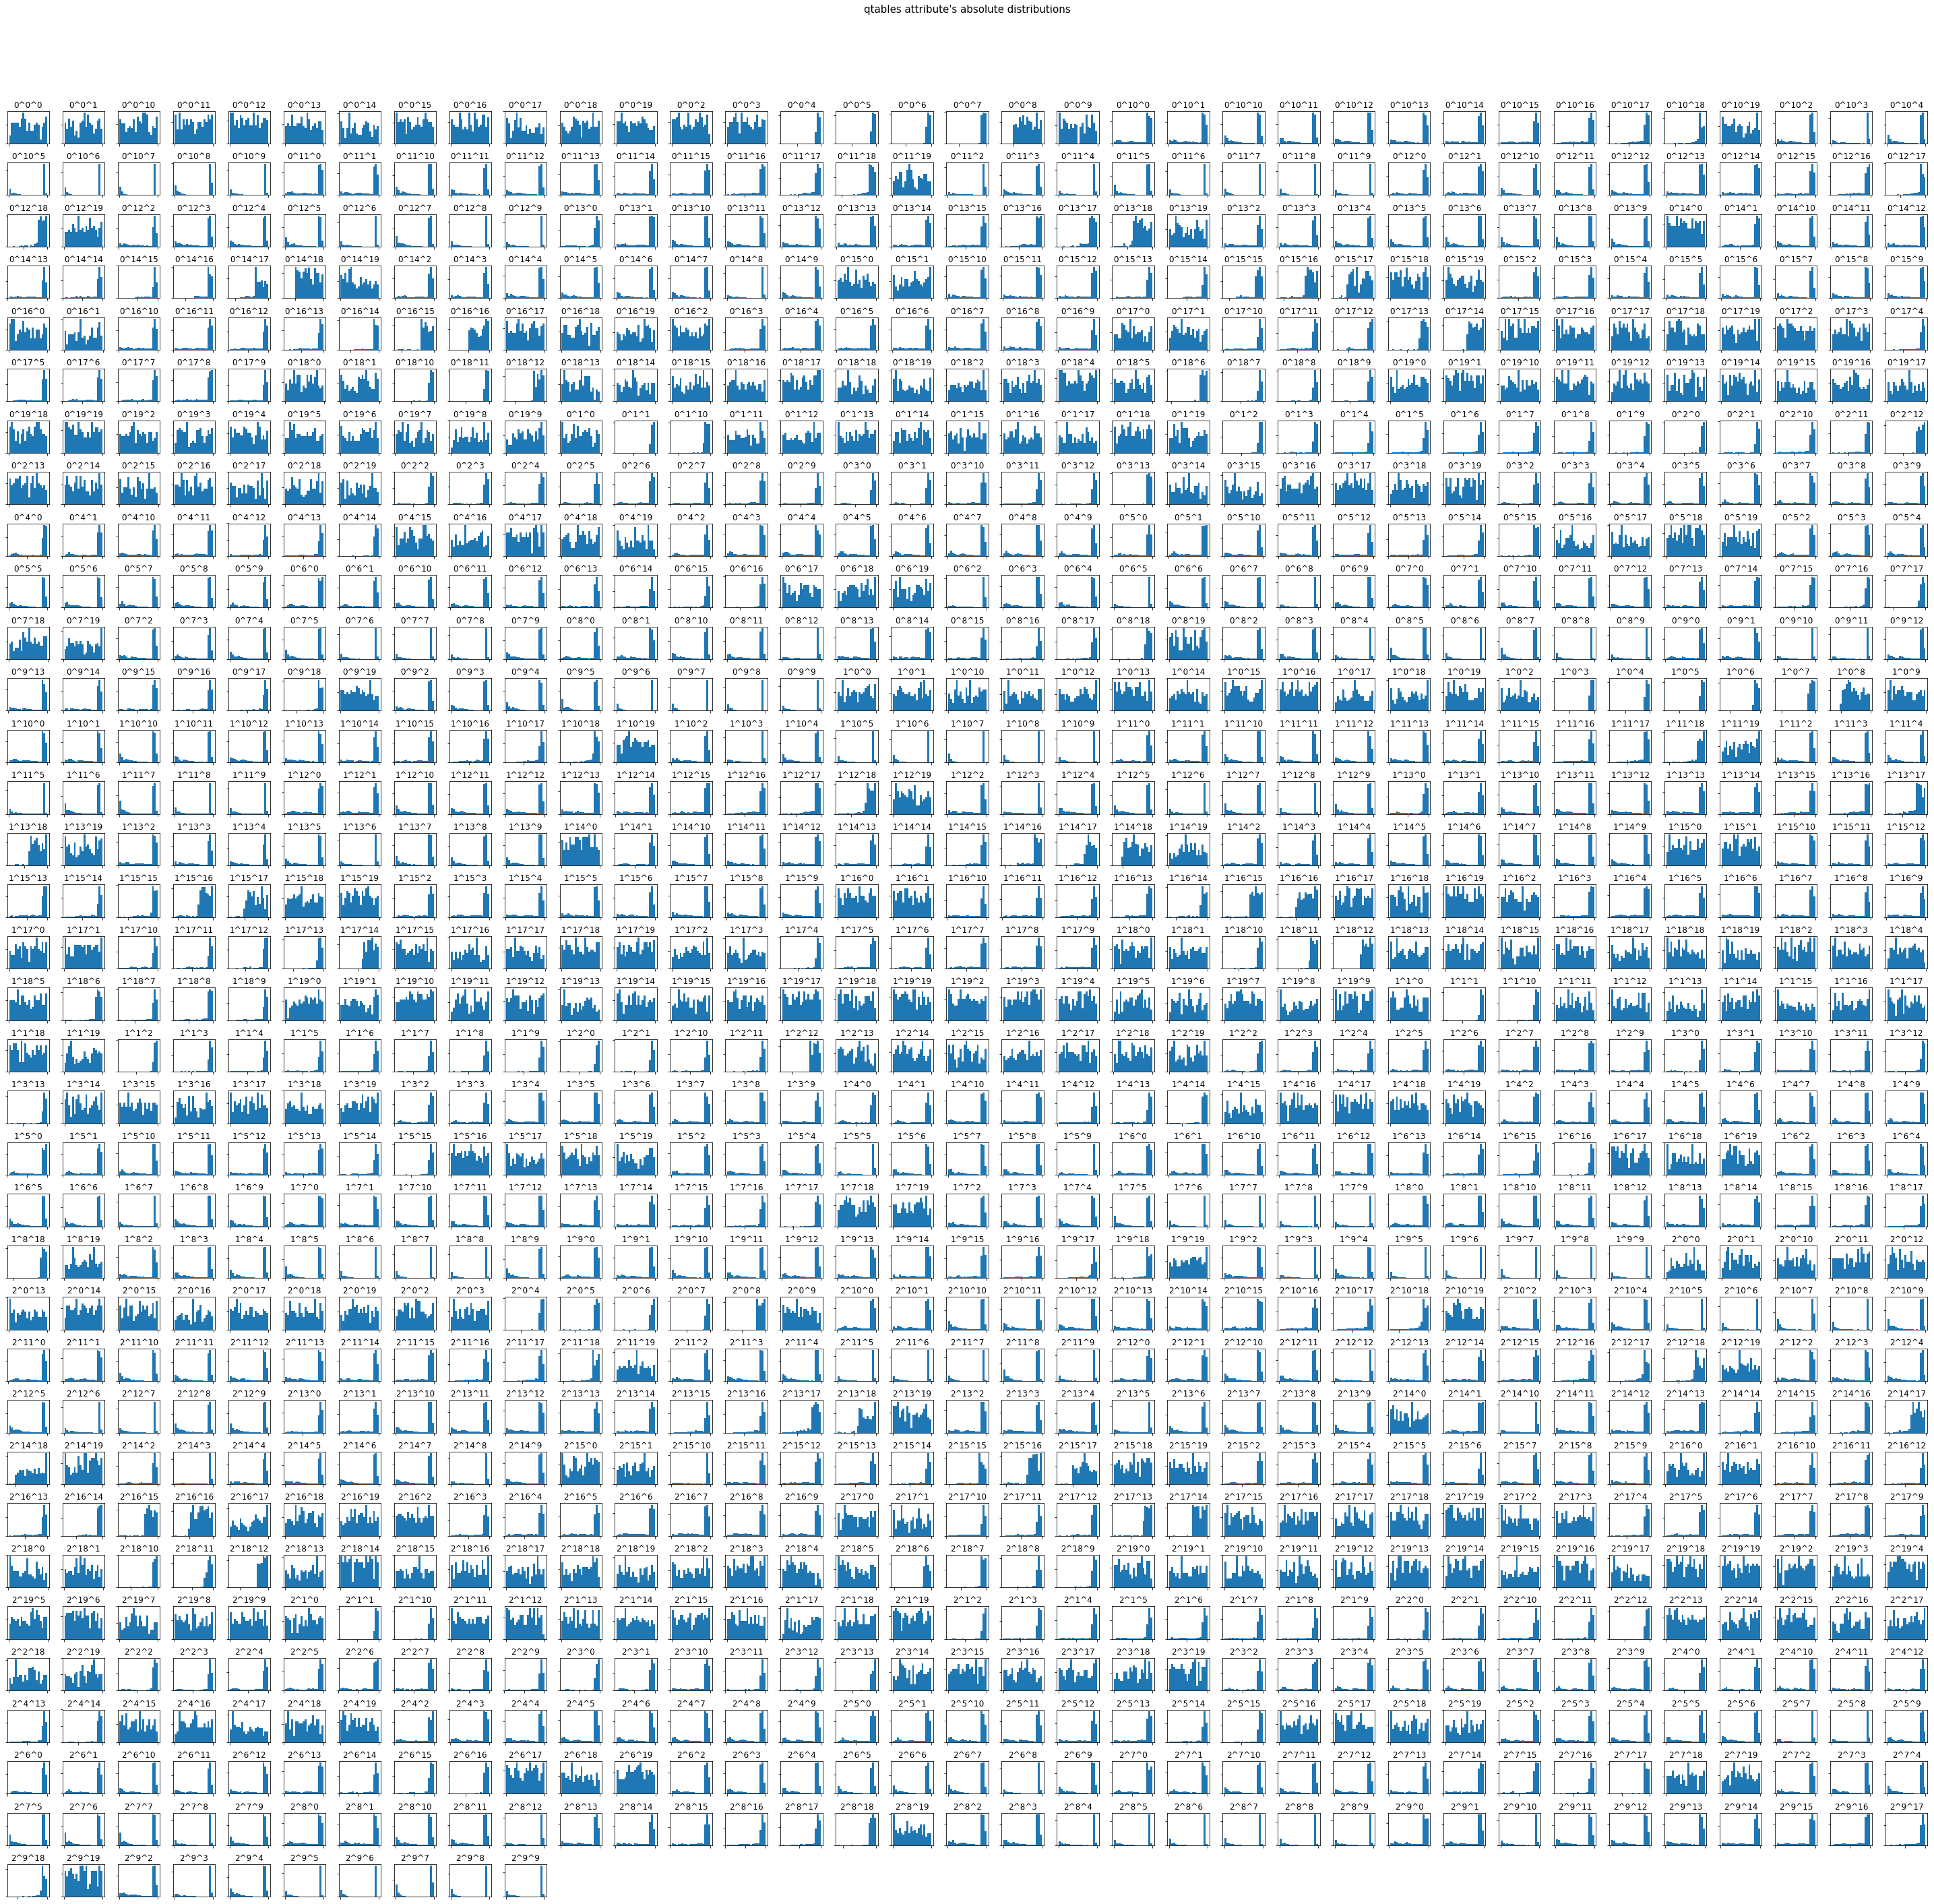

In [11]:
import matplotlib.pyplot as plt

# identifying distributions
hists_ax = df.hist(bins=20, grid=False, figsize=(40,40), density=True)

for arr in hists_ax:
    for ax in arr:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
plt.suptitle(fig_name + " attribute's absolute distributions", fontsize=15, weight='roman')
plt.tight_layout()
plt.subplots_adjust(top=0.925)
plt.savefig(stats_results_folder+"attribute_histograms/"+fig_name+"_attr_dist")

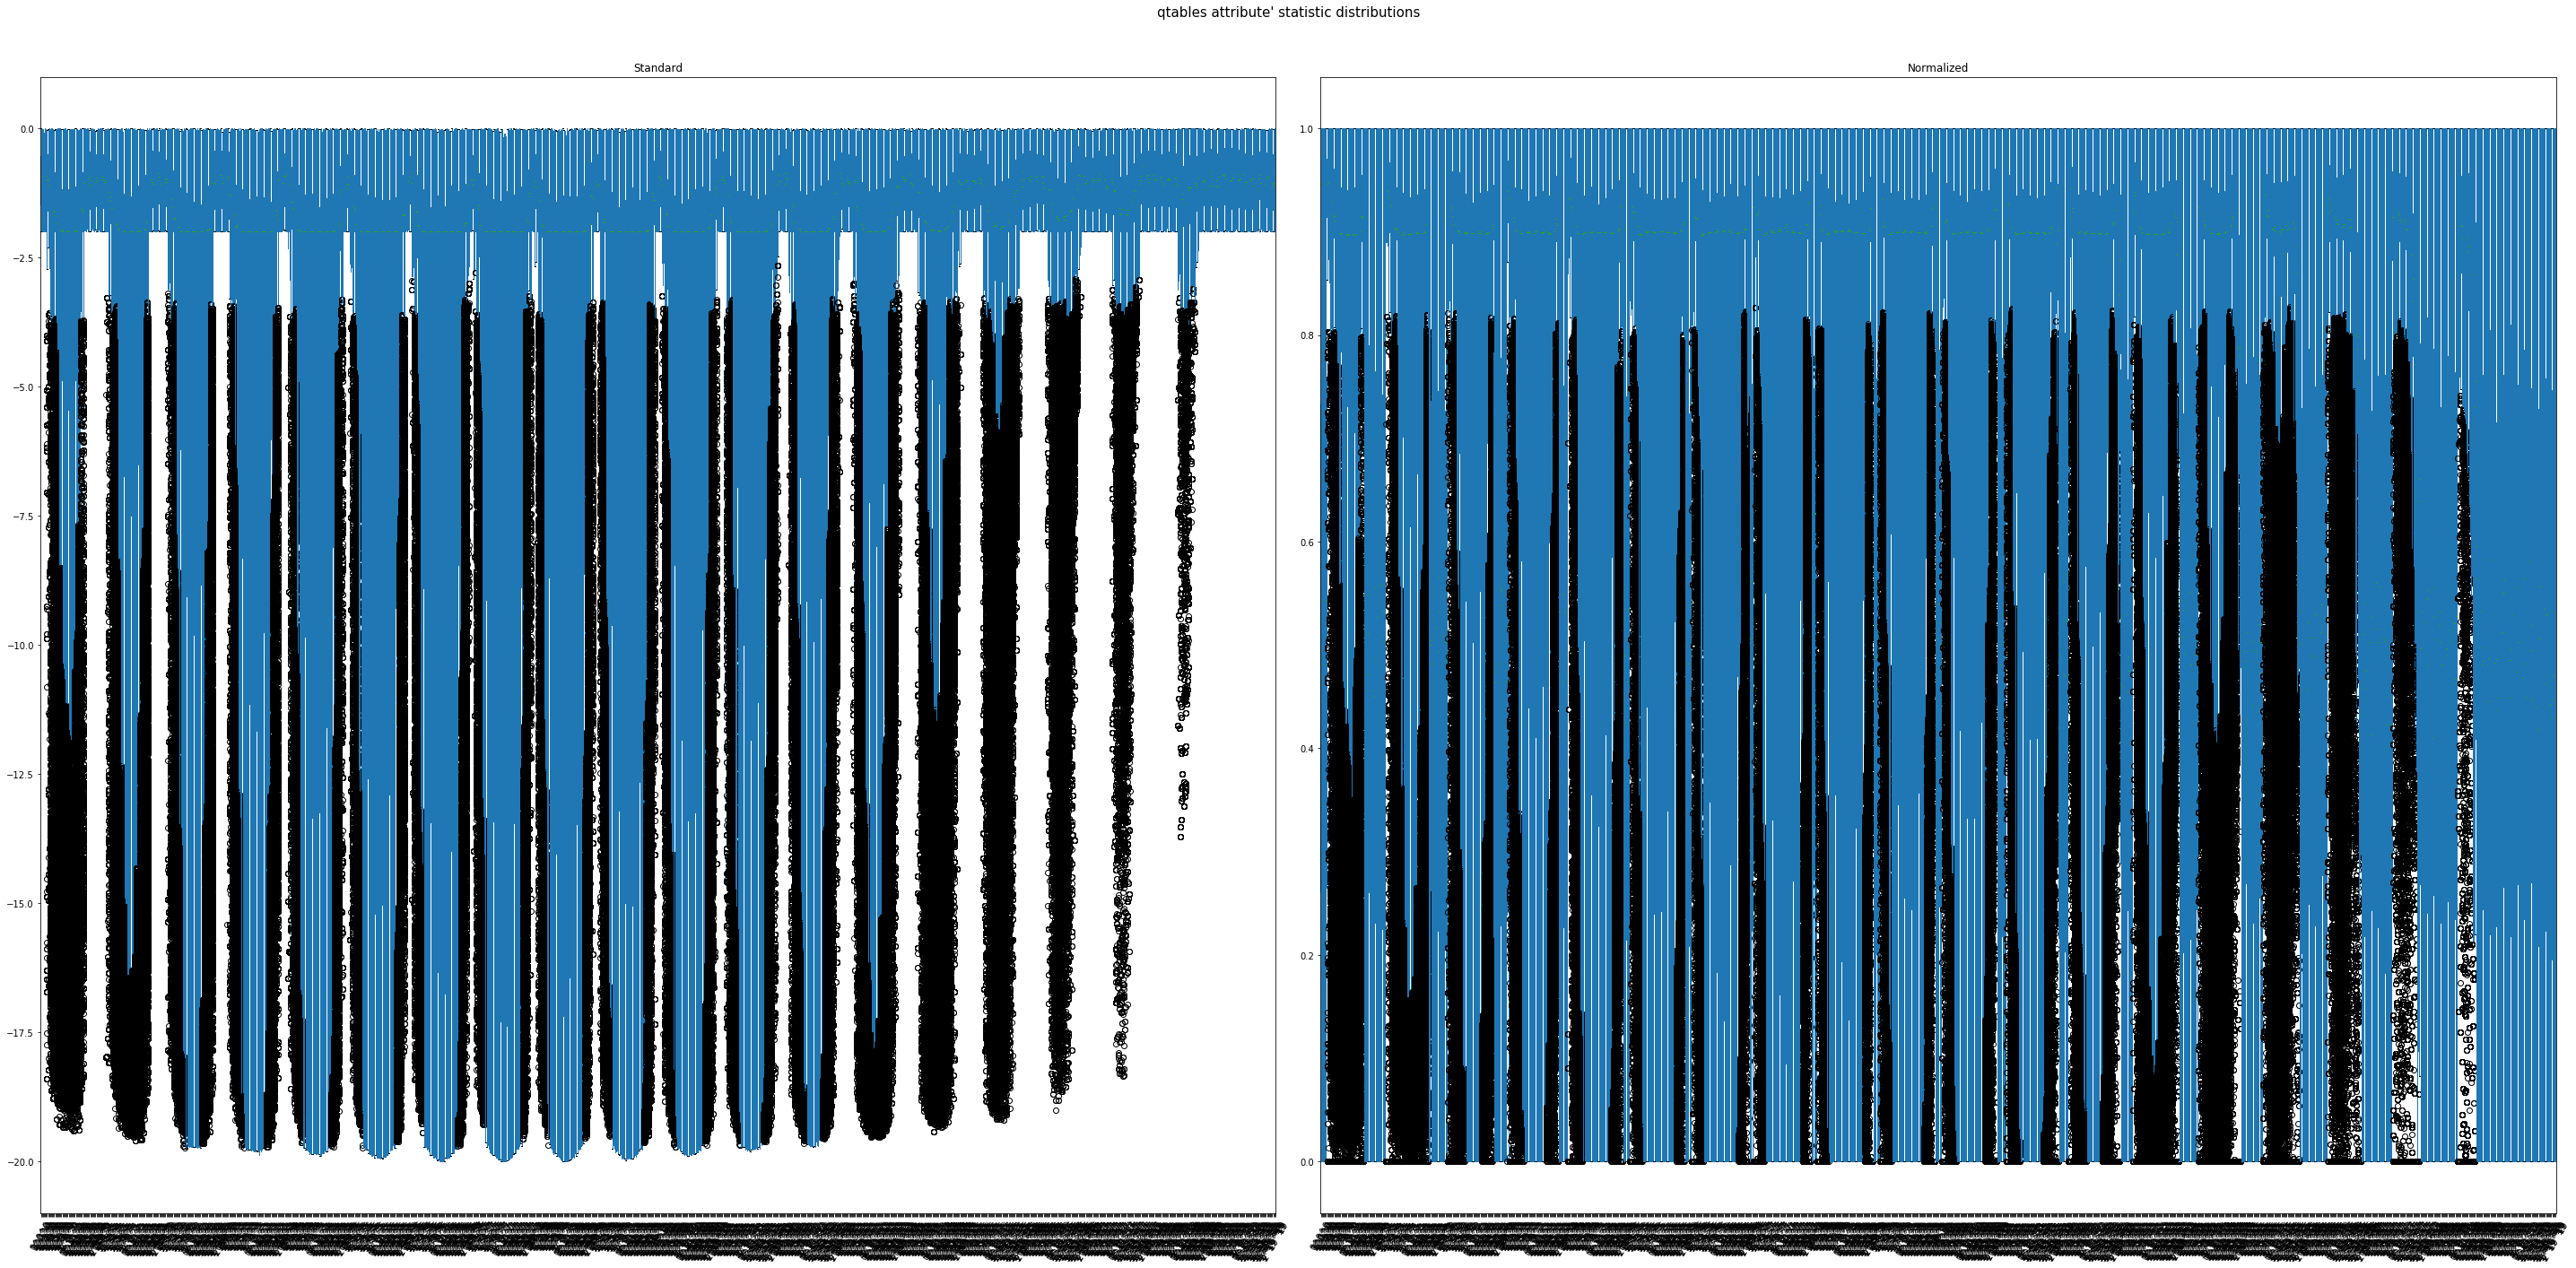

In [12]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40,20))

ax_box = df.plot.box(ax=axes[0])
ax_box.set_xticklabels(ax_box.get_xticklabels(), rotation=60);
ax_box.set_title("Standard")

min_max_scaler = MinMaxScaler()
ax_norm_box = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df)), columns=df.columns).plot.box(ax=axes[1])
ax_norm_box.set_xticklabels(ax_norm_box.get_xticklabels(), rotation=60);
ax_norm_box.set_title("Normalized");

plt.suptitle(fig_name + " attribute' statistic distributions", fontsize=15, weight='roman')
plt.tight_layout()
plt.subplots_adjust(top=0.925)

plt.savefig(stats_results_folder+"attribute_boxplots/"+fig_name+"_attr_statdist")